# RFM Analysis

RFM is a method used for analyzing customer value, creating customer segments. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- __Recency__ – How recently did the customer purchase? / What is the last time of shopping?
- __Frequency__ – How often does the customer purchase?
- __Monetary Value__ – How much does the customer spend?

__Steps:__
- Find R, F and M values
- Calculating RFM Scores
- Creating segments based on RFM scores --> That defines customer behavior
- Develop marketing strategies for each customer segment

## Business Problem

An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.

For this purpose, we will define the behavior of customers and create groups according to clustering in these behaviors.

In other words, we will include those who display common behaviors to the same groups and we will try to develop sales and marketing techniques specific to these groups.

**Data set story**

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

The data set named Online Retail II includes the sales of a UK based online store between 01/12/2009 - 09/12/2011.

This company sells souvenirs. It can be thought as promotional products.

Most of their customers are wholesale traders.

**Variables:**

- InvoiceNo: Invoice number. The unique number for each transaction i.e. invoice. If this code starts with C, it indicates that the transaction has been canceled.
- StockCode: Product code. Unique number for each product.
- Description: Product name
- Quantity: Number of items. It expresses how many products in the invoices are sold.
- InvoiceDate: Invoice date and time.
- UnitPrice: Product price (in Pounds)
- CustomerID: Unique customer number
- Country: Country name. The country where the customer lives.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to display all columns and rows:
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

# digits after comma --> 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)


## First Look into the Dataset

In [8]:
# DataFrame for the year of 2010-2011
df_2010_2011 = pd.read_excel("MVK Codes/Week 3 - Data Manipulation - RFM Analysis - Association Rules/online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [10]:
# Let's copy dataframe to be able reach the original dataset afterwards
df = df_2010_2011.copy()

In [11]:
# Show the first 5 rows of the dataset 
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [12]:
# Show the last 5 rows of the dataset 
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.00,France


In [13]:
# Shape of the dataset
df.shape

(541910, 8)

In [14]:
# See some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
# Check if there are any missing values
df.isnull().values.any()

True

In [16]:
# Missing values for each variable/column
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [18]:
# Number of unique values in column 'Description'? / How many different products do we have?
df["Description"].nunique()

4223

In [19]:
# Show the products and order quantity
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [20]:
# The most ordered products (in descending order)
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [21]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [22]:
# We need total spending for each customer, in order to make RFM Analysis. 
# So, let's calculate the total price for each row by simply multiplying quantity and price
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [23]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [24]:
# We know, if Invioce contains 'C', that means the customer has cancelled transaction. Let's catch the cancelled transactions.
df[df["Invoice"].str.contains("C", na = False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom,-6.96


In [25]:
# Remove the cancelled transactions from the dataset by using ~(Tilda).
df = df[~df["Invoice"].str.contains("C", na = False)]

In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [27]:
# See the total price for each Incoice 
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [28]:
# See the transaction counts / orders for each country.
df["Country"].value_counts()

United Kingdom          487622
Germany                   9042
France                    8409
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [29]:
# See the total price for each country in descending order
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,9003097.96
Netherlands,285446.34
EIRE,283453.96
Germany,228867.14
France,209733.11


In [30]:
# What is the most cancelled/refunded product?

In [31]:
# Let's go back to the first version of the dataset
df1 = df_2010_2011.copy()

In [32]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [33]:
df1[df1["Invoice"].str.contains("C", na = False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom


In [34]:
# Define a new dataframe that keeps the cancelled orders.
df2 = df1[df1["Invoice"].str.contains("C", na = False)]

In [35]:
# Find the most refunded products in descending order
df2["Description"].value_counts().head()

Manual                      244
REGENCY CAKESTAND 3 TIER    181
POSTAGE                     126
JAM MAKING SET WITH JARS     87
Discount                     77
Name: Description, dtype: int64

In [36]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [37]:
# See the null/missing values in the dataset
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134697
Country             0
TotalPrice          0
dtype: int64

In [38]:
# For simplicity just drop the  Null values for this dataset. Filling missing values will be done in another notebook.
df.dropna(inplace = True)

In [39]:
# Now we have a dataset without any null values
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [40]:
# New shape of teh dataset
df.shape

(397925, 9)

In [41]:
# See the distribution of the dataset by looking at the quartiles. You an see, that there are outliers in the dataset! 
# For example, we can drop the values greater than 120 for Quantity variable.
# Because we are not building a model now, we can omit outlier analysis for the time being.
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397925.00,13.02,180.42,1.00,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.00,120.00,80995.00
Price,397925.00,3.12,22.10,0.00,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.50,14.95,8142.75
Customer ID,397925.00,15294.31,1713.17,12346.00,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.00,18211.00,18287.00
TotalPrice,397925.00,22.39,309.06,0.00,0.55,1.25,1.95,4.68,11.80,19.80,35.40,67.50,202.50,168469.60


In [42]:
# This is a funtion, that tells there are outliers in the dataset.
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
963
Price yes
661
TotalPrice yes
903


## Customer Segmentation with RFM Scores

It consists of the initials of Recency, Frequency, Monetary.

It is a technique that helps determine marketing and sales strategies based on customers' buying habits.

__Recency__: Time since the customer's last purchase

- In other words, it is the time elapsed since the last contact of the customer.

- Today's date - Last purchase

- For example, if we are doing this analysis today, today's date - the last product purchase date.

- For example, this could be 20 or 100. We know that the customer with Recency = 20 is hotter. He has been in contact with us recently.

__Frequency__: Total number of purchases.

__Monetary__: The total expenditure made by the customer.

# Recency

In [45]:
# See the first 5 rows again to remember the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [46]:
# See the basic information, as well.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      397925 non-null  object        
 8   TotalPrice   397925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [47]:
# The first transacton in our dataset
df["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [48]:
# The last transacton in our dataset
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [49]:
# We will accept the last transacton date in our dataset as today's date to be able to calculate Recency logically.
import datetime as dt
today_date = dt.datetime(2011, 12, 9)

In [50]:
# Check today's date
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [51]:
# Last transaction dates for each customer
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:01:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [52]:
# Make CustomerId integer
df["Customer ID"] = df["Customer ID"].astype(int)

In [53]:
# Remember the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [54]:
# Last transaction dates for each customer (int)
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:01:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [55]:
# Time passed after the last transaction. Save this as temporary df
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
temp_df.head()

,InvoiceDate
Customer ID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [56]:
# Rename "InvoiceDate" as "Recency"
temp_df.rename(columns = {"InvoiceDate":"Recency"}, inplace = True)
temp_df.head()

,Recency
Customer ID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [57]:
# We will use .days funtion to remove unneccessary parts. Here is an example for this.
temp_df.iloc[0,0].days

324

In [58]:
# It's not perfect, yet. Remove unneccessary parts, but days! For his purpose, we can use apply / lambda structure.
recency_df = temp_df["Recency"].apply(lambda x: x.days)
recency_df.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

In [59]:
# We could do this in only one row-code, too. 
df.groupby("Customer ID").agg({"InvoiceDate": lambda x: (today_date - x.max()).days}).sort_values(by = 'InvoiceDate', ascending = False).head()
# We can also renmae column as 'Recency'

,InvoiceDate
Customer ID,
14729,372
15350,372
15922,372
14237,372
16274,372


# Frequency


In [60]:
# Remember the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [61]:
# We need to find the number of invoices for each customer.
df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"nunique"}).head(50)

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626         1
            542237         1
            549222         1
            556201         1
            562032         1
            573511         1
            581180         1
12348       539318         1
            541998         1
            548955         1
            568172         1
12349       577609         1
12350       543037         1
12352       544156         1
            545323         1
            545332         1
            546869         1
            547390         1
            567505         1
            568699         1
            574275         1
12353       553900         1
12354       550911         1
12355       552449         1
12356       541430         1
            549435         1
            576895         1
12357       574740         1
12358       559707         1
            581232         1
12359       540946         1
            543370         1
            555477         1
            571034         1
12360       554132         1
            563749         1
            571705         1
12361       545017         1
12362       544203         1
            551346         1
            559295         1
            563037         1
            568651         1
            570667         1
            572887         1
            573173         1
            574329         1
            580979         1
12363       549687         1

In [62]:
# We can calculate Fequency by simply finding number of unique values for each customer 
freq_df = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"})
freq_df.head()

,InvoiceDate
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [63]:
# And, finally rename the column as 'Frequency'
freq_df.rename(columns={"InvoiceDate": "Frequency"}, inplace=True)
freq_df.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


# Monetary

In [64]:
# Remember the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [65]:
# We need one more variable for RFM analysis--> Monetary: How much money did each customer spent?. 
# Let's bring 'TotalPrice' for each customer.
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.head()

,TotalPrice
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [66]:
# And rename the column
monetary_df.rename(columns={"TotalPrice":"Monetary"}, inplace=True)
monetary_df.head()

,Monetary
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [67]:
#See the shapes of recency_df, freq_df and monetary_df
print(recency_df.shape, freq_df.shape, monetary_df.shape)

(4339,) (4339, 1) (4339, 1)


In [68]:
# Concatenate these seperate dataframes and make one --> rfm. Show the first 5 rows.
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,17,1,1757.55
12350,309,1,334.40


In [69]:
# Assign Recency scores by using pd.qcut(). Do not forget, Recency smaller is better. If Recency i.e. 1, that means the customer is still hot!  
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore
Customer ID,,,,
12346,324,1,77183.60,1
12347,1,7,4310.00,5
12348,74,4,1797.24,2
12349,17,1,1757.55,4
12350,309,1,334.40,1


In [70]:
# Assing Frequency scores. If Frequeny is bigger, then F score value is greater, as well. 
# Beacuse the frequencies are small to divide, we got an error (ValueError). We can use rank() method.
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels = [1, 2, 3, 4, 5])

ValueError: Bin edges must be unique: array([  1.,   1.,   2.,   3.,   6., 211.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [71]:
# Assing Frequency scores. If Frequeny is bigger, then F score value is greater, as well. Here we can use rank() method. 
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore
Customer ID,,,,,
12346,324,1,77183.60,1,1
12347,1,7,4310.00,5,5
12348,74,4,1797.24,2,4
12349,17,1,1757.55,4,1
12350,309,1,334.40,1,1


In [72]:
# Assign Monetary scores. If Monetary is greater, then M score is greater, too.
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,324,1,77183.60,1,1,5
12347,1,7,4310.00,5,5,5
12348,74,4,1797.24,2,4,4
12349,17,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2


In [73]:
# Our RFM Score will be something like '111', '123', ..., '555', which shows R, F and M scores sequently.
(rfm['RecencyScore'].astype(str) + 
 rfm['FrequencyScore'].astype(str) + 
 rfm['MonetaryScore'].astype(str)).head()

Customer ID
12346    115
12347    555
12348    244
12349    414
12350    112
dtype: object

In [74]:
# Transform RFM scores into categorical variables and add them to the rfm dataframe.
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                    rfm['FrequencyScore'].astype(str) + 
                    rfm['MonetaryScore'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,324,1,77183.60,1,1,5,115
12347,1,7,4310.00,5,5,5,555
12348,74,4,1797.24,2,4,4,244
12349,17,1,1757.55,4,1,4,414
12350,309,1,334.40,1,1,2,112


In [75]:
# See the summary of the new dataframe - rfm 
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.00,91.04,100.01,-1.00,16.00,49.00,140.50,372.00
Frequency,4339.00,4.25,7.64,1.00,1.00,2.00,5.00,211.00
Monetary,4339.00,2053.80,8988.25,0.00,307.24,674.45,1661.64,280206.02


In [76]:
# Bring the customers with '555' RFM score --> champions
rfm[rfm["RFM_SCORE"]=="555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12347,1,7,4310.00,5,5,5,555
12362,2,10,5226.23,5,5,5,555
12417,2,9,3649.10,5,5,5,555
12433,-1,7,13375.87,5,5,5,555
12437,0,18,4951.41,5,5,5,555


In [77]:
# Bring the customers with '111' RFM score --> hibernating
rfm[rfm["RFM_SCORE"] == "111"].head() 

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,1,89.00,1,1,1,111
12361,286,1,189.90,1,1,1,111
12401,302,1,84.30,1,1,1,111
12402,322,1,225.60,1,1,1,111
12441,365,1,173.55,1,1,1,111


In [78]:
# RFM Mapping by using Regular Expressions 
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [79]:
# For segmenting we will use R and F scores
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,324,1,77183.60,1,1,5,115,11
12347,1,7,4310.00,5,5,5,555,55
12348,74,4,1797.24,2,4,4,244,24
12349,17,1,1757.55,4,1,4,414,41
12350,309,1,334.40,1,1,2,112,11


In [80]:
# Let's replace segment names with the seg_map names.
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,324,1,77183.60,1,1,5,115,Hibernating
12347,1,7,4310.00,5,5,5,555,Champions
12348,74,4,1797.24,2,4,4,244,At Risk
12349,17,1,1757.55,4,1,4,414,Promising
12350,309,1,334.40,1,1,2,112,Hibernating


In [81]:
# Let's create a wonderful summary table by showing segments and R, F, M values and a few statistics.
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Segment                                                                    
About to Sleep        51.37     51   353      1.16      1   353   472.55   
At Risk              152.04    137   594      2.87      3   594  1079.81   
Can't Loose          130.05    105    64      8.31      7    64  2791.01   
Champions              4.37      3   632     12.34      8   632  6866.78   
Hibernating          215.66    217  1069      1.10      1  1069   488.86   
Loyal Customers       31.69     28   820      6.44      5   820  2862.89   
Need Attention        50.27     50   184      2.32      2   184   894.49   
New Customers          5.43      6    42      1.00      1    42   388.21   
Potential Loyalists   15.37     16   486      2.01      2   486  1041.34   
Promising             21.42     21    95      1.00      1    95   290.91   

                                   
                     median count  
Segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

In [82]:
# Number of customers we have in the dataset
rfm.shape[0]

4339

In [83]:
len(rfm[["Segment","Recency","Frequency", "Monetary"]].Segment.unique())

10

##### Now, we can say, instead of 4339 customers, we have 10 customer segments, we can handle seperately!

### Results and Comments

__Segments and Descriptions__

- Champions: Bought recently, buy often and spend the most

- Loyal Customers: Buy on a regular basis. Responsive to promotions.

- Potential Loyalist: Recent customers with average frequency.

- Recent Customers: Bought most recently, but not often.

- Promising: Recent shoppers, but haven’t spent much.

- Customers Needing Attention: Above average recency, frequency and monetary values. May not have bought very recently though.

- About To Sleep: Below average recency and frequency. Will lose them if not reactivated.

- At Risk: Purchased often but a long time ago. Need to bring them back!

- Can’t Lose Them: Used to purchase frequently but haven’t returned for a long time.

- Hibernating: Last purchase was long back and low number of orders. May be lost.

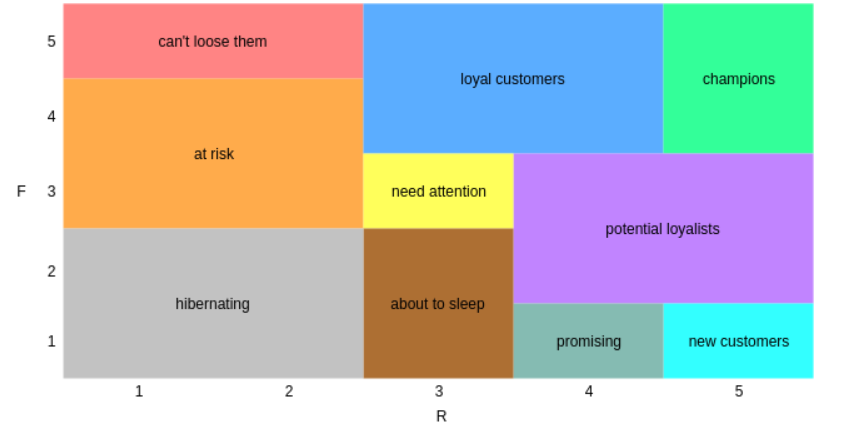

#### Need Attention

In [84]:
# Bring this precious table back, again.
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Segment                                                                    
About to Sleep        51.37     51   353      1.16      1   353   472.55   
At Risk              152.04    137   594      2.87      3   594  1079.81   
Can't Loose          130.05    105    64      8.31      7    64  2791.01   
Champions              4.37      3   632     12.34      8   632  6866.78   
Hibernating          215.66    217  1069      1.10      1  1069   488.86   
Loyal Customers       31.69     28   820      6.44      5   820  2862.89   
Need Attention        50.27     50   184      2.32      2   184   894.49   
New Customers          5.43      6    42      1.00      1    42   388.21   
Potential Loyalists   15.37     16   486      2.01      2   486  1041.34   
Promising             21.42     21    95      1.00      1    95   290.91   

                                   
                     median count  
Segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

In [85]:
# Bring the customers in 'Need Attention' segment
rfm[rfm["Segment"] == "Need Attention"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12360,51,3,2662.06,3,3,5,335,Need Attention
12372,70,3,1298.04,3,3,4,334,Need Attention
12413,65,3,758.10,3,3,3,333,Need Attention
12456,43,3,3181.04,3,3,5,335,Need Attention
12536,42,3,12601.83,3,3,5,335,Need Attention


In [86]:
# List the indexes of Need Attention segment
rfm[rfm["Segment"] == "Need Attention"].index 

Int64Index([12360, 12372, 12413, 12456, 12536, 12577, 12759, 12808, 12879,
            12885,
            ...
            17928, 17934, 17999, 18147, 18160, 18205, 18228, 18252, 18261,
            18270],
           dtype='int64', name='Customer ID', length=184)

__Comments__: 

- There are 184 customers in this group.
- They have not been shopping for an average of 50.27 days.
- They shopped an average of 2.32 times.
- We have gained an average of 849.49 pounds from them.

As data scientists, we can say Customer Relations Department to trace these customers to prevent churn. If not, we know, that these customers show the symptoms of churn. This segment can be pulled into the segemnts of 'Potential Loyalists' or 'Loyal Customers', if treated well. On the other hand, if nothing is done, they can land in the segments of 'At Risk', 'Hibernating' or 'About to Sleep', which affects the company very badly.

They stopped shopping for some reason so we need to find out the reason for it and we can remind ourselves to them. Targeted E-mailing, special discounts, sending gifts, special promotions, free fast deliveries for limited time, etc can be here applied in order to gain them again. However, another important aspect of customer relations comes here in play, which is __'Price Fairness'__. Other customers can perceive these special treatment as unfair, which in result affects the company in a negative way. 

#### New Customers

In [87]:
# Bring this precious table back, again.
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Segment                                                                    
About to Sleep        51.37     51   353      1.16      1   353   472.55   
At Risk              152.04    137   594      2.87      3   594  1079.81   
Can't Loose          130.05    105    64      8.31      7    64  2791.01   
Champions              4.37      3   632     12.34      8   632  6866.78   
Hibernating          215.66    217  1069      1.10      1  1069   488.86   
Loyal Customers       31.69     28   820      6.44      5   820  2862.89   
Need Attention        50.27     50   184      2.32      2   184   894.49   
New Customers          5.43      6    42      1.00      1    42   388.21   
Potential Loyalists   15.37     16   486      2.01      2   486  1041.34   
Promising             21.42     21    95      1.00      1    95   290.91   

                                   
                     median count  
Segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

In [88]:
# Bring the customers in 'New Customers' segment
rfm[rfm["Segment"] == "New Customers"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12367,3,1,168.90,5,1,1,511,New Customers
12442,2,1,172.06,5,1,1,511,New Customers
12478,2,1,680.99,5,1,3,513,New Customers
12479,10,1,527.20,5,1,3,513,New Customers
12558,6,1,269.96,5,1,2,512,New Customers


In [89]:
# List the indexes of New Customers
rfm[rfm["Segment"] == "New Customers"].index 

Int64Index([12367, 12442, 12478, 12479, 12558, 12587, 12650, 12660, 12713,
            12953, 12966, 13017, 13153, 13188, 13298, 13349, 13428, 13436,
            13560, 13790, 13844, 14087, 14093, 14204, 14219, 14349, 14480,
            14569, 14578, 14601, 14804, 14954, 15097, 15148, 15195, 15318,
            15471, 15520, 15539, 15540, 15619, 15721],
           dtype='int64', name='Customer ID')

__Comments__: 

- There are 42 customers in this group.
- They have not been shopping for an average of 5.43 days.
- They shopped an average of 1 time.
- We have gained an average of 388.21 pounds from them.

New Customers are your customers who have a high overall RFM score but are not frequent shoppers. Start building relationships with these customers by providing onboarding support and special offers to increase their visits.


#### Champions

In [90]:
# Bring this precious table back, again.
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Segment                                                                    
About to Sleep        51.37     51   353      1.16      1   353   472.55   
At Risk              152.04    137   594      2.87      3   594  1079.81   
Can't Loose          130.05    105    64      8.31      7    64  2791.01   
Champions              4.37      3   632     12.34      8   632  6866.78   
Hibernating          215.66    217  1069      1.10      1  1069   488.86   
Loyal Customers       31.69     28   820      6.44      5   820  2862.89   
Need Attention        50.27     50   184      2.32      2   184   894.49   
New Customers          5.43      6    42      1.00      1    42   388.21   
Potential Loyalists   15.37     16   486      2.01      2   486  1041.34   
Promising             21.42     21    95      1.00      1    95   290.91   

                                   
                     median count  
Segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

In [91]:
# Bring the customers in 'Champions' segment
rfm[rfm["Segment"] == "Champions"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12347,1,7,4310.00,5,5,5,555,Champions
12362,2,10,5226.23,5,5,5,555,Champions
12364,6,4,1313.10,5,4,4,544,Champions
12381,3,5,1845.31,5,4,4,544,Champions
12417,2,9,3649.10,5,5,5,555,Champions


In [92]:
# List the indexes of Champions
rfm[rfm["Segment"] == "Champions"].index 

Int64Index([12347, 12362, 12364, 12381, 12417, 12423, 12429, 12433, 12437,
            12451,
            ...
            18223, 18225, 18229, 18230, 18237, 18241, 18245, 18272, 18273,
            18283],
           dtype='int64', name='Customer ID', length=632)

__Comments__: 

- There are 632 customers in this group.
- They have not been shopping for an average of 3 days.
- They shopped an average of 12.34 times.
- We have gained an average of 6866.78 pounds from them.

Champions are your best customers, who bought most recently, most often, and are heavy spenders. Reward these customers. They can become early adopters for new products and will help promote your brand.


#### Loyal Customers

In [93]:
# Bring this precious table back, again.
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Segment                                                                    
About to Sleep        51.37     51   353      1.16      1   353   472.55   
At Risk              152.04    137   594      2.87      3   594  1079.81   
Can't Loose          130.05    105    64      8.31      7    64  2791.01   
Champions              4.37      3   632     12.34      8   632  6866.78   
Hibernating          215.66    217  1069      1.10      1  1069   488.86   
Loyal Customers       31.69     28   820      6.44      5   820  2862.89   
Need Attention        50.27     50   184      2.32      2   184   894.49   
New Customers          5.43      6    42      1.00      1    42   388.21   
Potential Loyalists   15.37     16   486      2.01      2   486  1041.34   
Promising             21.42     21    95      1.00      1    95   290.91   

                                   
                     median count  
Segment                            
About to Sleep       331.95   353  
At Risk              675.16   594  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          293.00  1069  
Loyal Customers     1737.83   820  
Need Attention       637.78   184  
New Customers        274.50    42  
Potential Loyalists  524.00   486  
Promising            219.00    95

In [94]:
# Bring the customers in 'Champions' segment
rfm[rfm["Segment"] == "Loyal Customers"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12352,35,8,2506.04,3,5,5,355,Loyal Customers
12359,56,4,6372.58,3,4,5,345,Loyal Customers
12370,50,4,3545.69,3,4,5,345,Loyal Customers
12380,20,4,2724.81,4,4,5,445,Loyal Customers
12388,14,6,2780.66,4,4,5,445,Loyal Customers


In [95]:
# List the indexes of Loyal Customers
rfm[rfm["Segment"] == "Loyal Customers"].index 

Int64Index([12352, 12359, 12370, 12380, 12388, 12395, 12407, 12408, 12415,
            12421,
            ...
            18204, 18211, 18221, 18226, 18235, 18236, 18257, 18259, 18263,
            18287],
           dtype='int64', name='Customer ID', length=820)

__Comments__: 

- There are 820 customers in this group.
- They have not been shopping for an average of 28 days.
- They shopped an average of 5 times.
- We have gained an average of 2862.89 pounds from them.

Potential Loyalists are highly recent customers with high frequency and who spent a good amount. Offer loyalty & reward programs or recommend related products to upsell them and help them become your Champions. Engage them. Ask for reviews.


In [96]:
# Catch nustoemr ID's and save them in a csv file
new_df = pd.DataFrame()
new_df["LoyalCustomersID"] = rfm[rfm["Segment"] == "Loyal Customers"].index
new_df.head()

,LoyalCustomersID
0,12352
1,12359
2,12370
3,12380
4,12388


In [97]:
# save dataframe in a csv file. Now, we can send this file to the department, which is going to take neccessary measures / actions.
new_df.to_csv('loyal_customers.csv', index=False)

## Conclusion

RFM is a data-driven customer segmentation technique that allows marketers to take tactical decisions. It empowers marketers to quickly identify and segment users into homogeneous groups and target them with differentiated and personalized marketing strategies. This in turn improves user engagement and retention.

## References

- VBO - Data Science Machine Learning Bootcamp, Lecturer: M. Vahit Keskin
- https://guillaume-martin.github.io/rfm-segmentation-with-python.html
- https://de.ryte.com/wiki/RFM-Analyse
- https://medium.com/@sbkaracan/rfm-analizi-ile-m%C3%BC%C5%9Fteri-segmentasyonu-proje-416e57efd0cf
- https://clevertap.com/blog/rfm-analysis/
- https://towardsdatascience.com/know-your-customers-with-rfm-9f88f09433bc
- https://www.putler.com/rfm-analysis/
- https://de.ryte.com/wiki/RFM-Analyse
